In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *
import pingouin as pg
import itertools

In [2]:
df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters_with_combined_net_testing_metrics.csv')

In [3]:
df.columns

Index(['object_id', 'specz', 'g_cmodel_mag', 'NUMBER_IN_CENTER_30PX_DIAMETER',
       'NUMBER_IN_CENTER_20PX_DIAMETER', 'NUMBER_IN_CENTER_10PX_DIAMETER',
       'NUMBER', 'PETRO_RADIUS', 'X_IMAGE', 'Y_IMAGE', 'XMIN_IMAGE',
       'XMAX_IMAGE', 'YMIN_IMAGE', 'YMAX_IMAGE', 'ISOAREA_IMAGE',
       'ISOAREA_WORLD', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 'THETA_WORLD',
       'MU_MAX', 'ELLIPTICITY', 'FLUX_RADIUS', 'SPHEROID_SERSICN',
       'distance_from_center', 'photoz', 'bias', 'abs_bias', 'outlier_rate',
       'loss', 'rmse'],
      dtype='object')

In [4]:
metrics = df[['bias', 'abs_bias', 'outlier_rate', 'loss', 'rmse']]
params = df[['NUMBER_IN_CENTER_30PX_DIAMETER', 'NUMBER_IN_CENTER_20PX_DIAMETER', 'NUMBER_IN_CENTER_10PX_DIAMETER', 'PETRO_RADIUS', 'ISOAREA_IMAGE', 'A_IMAGE', 'B_IMAGE', 'THETA_IMAGE', 'MU_MAX', 'ELLIPTICITY', 'FLUX_RADIUS', 'SPHEROID_SERSICN', 'distance_from_center']]

<Axes: >

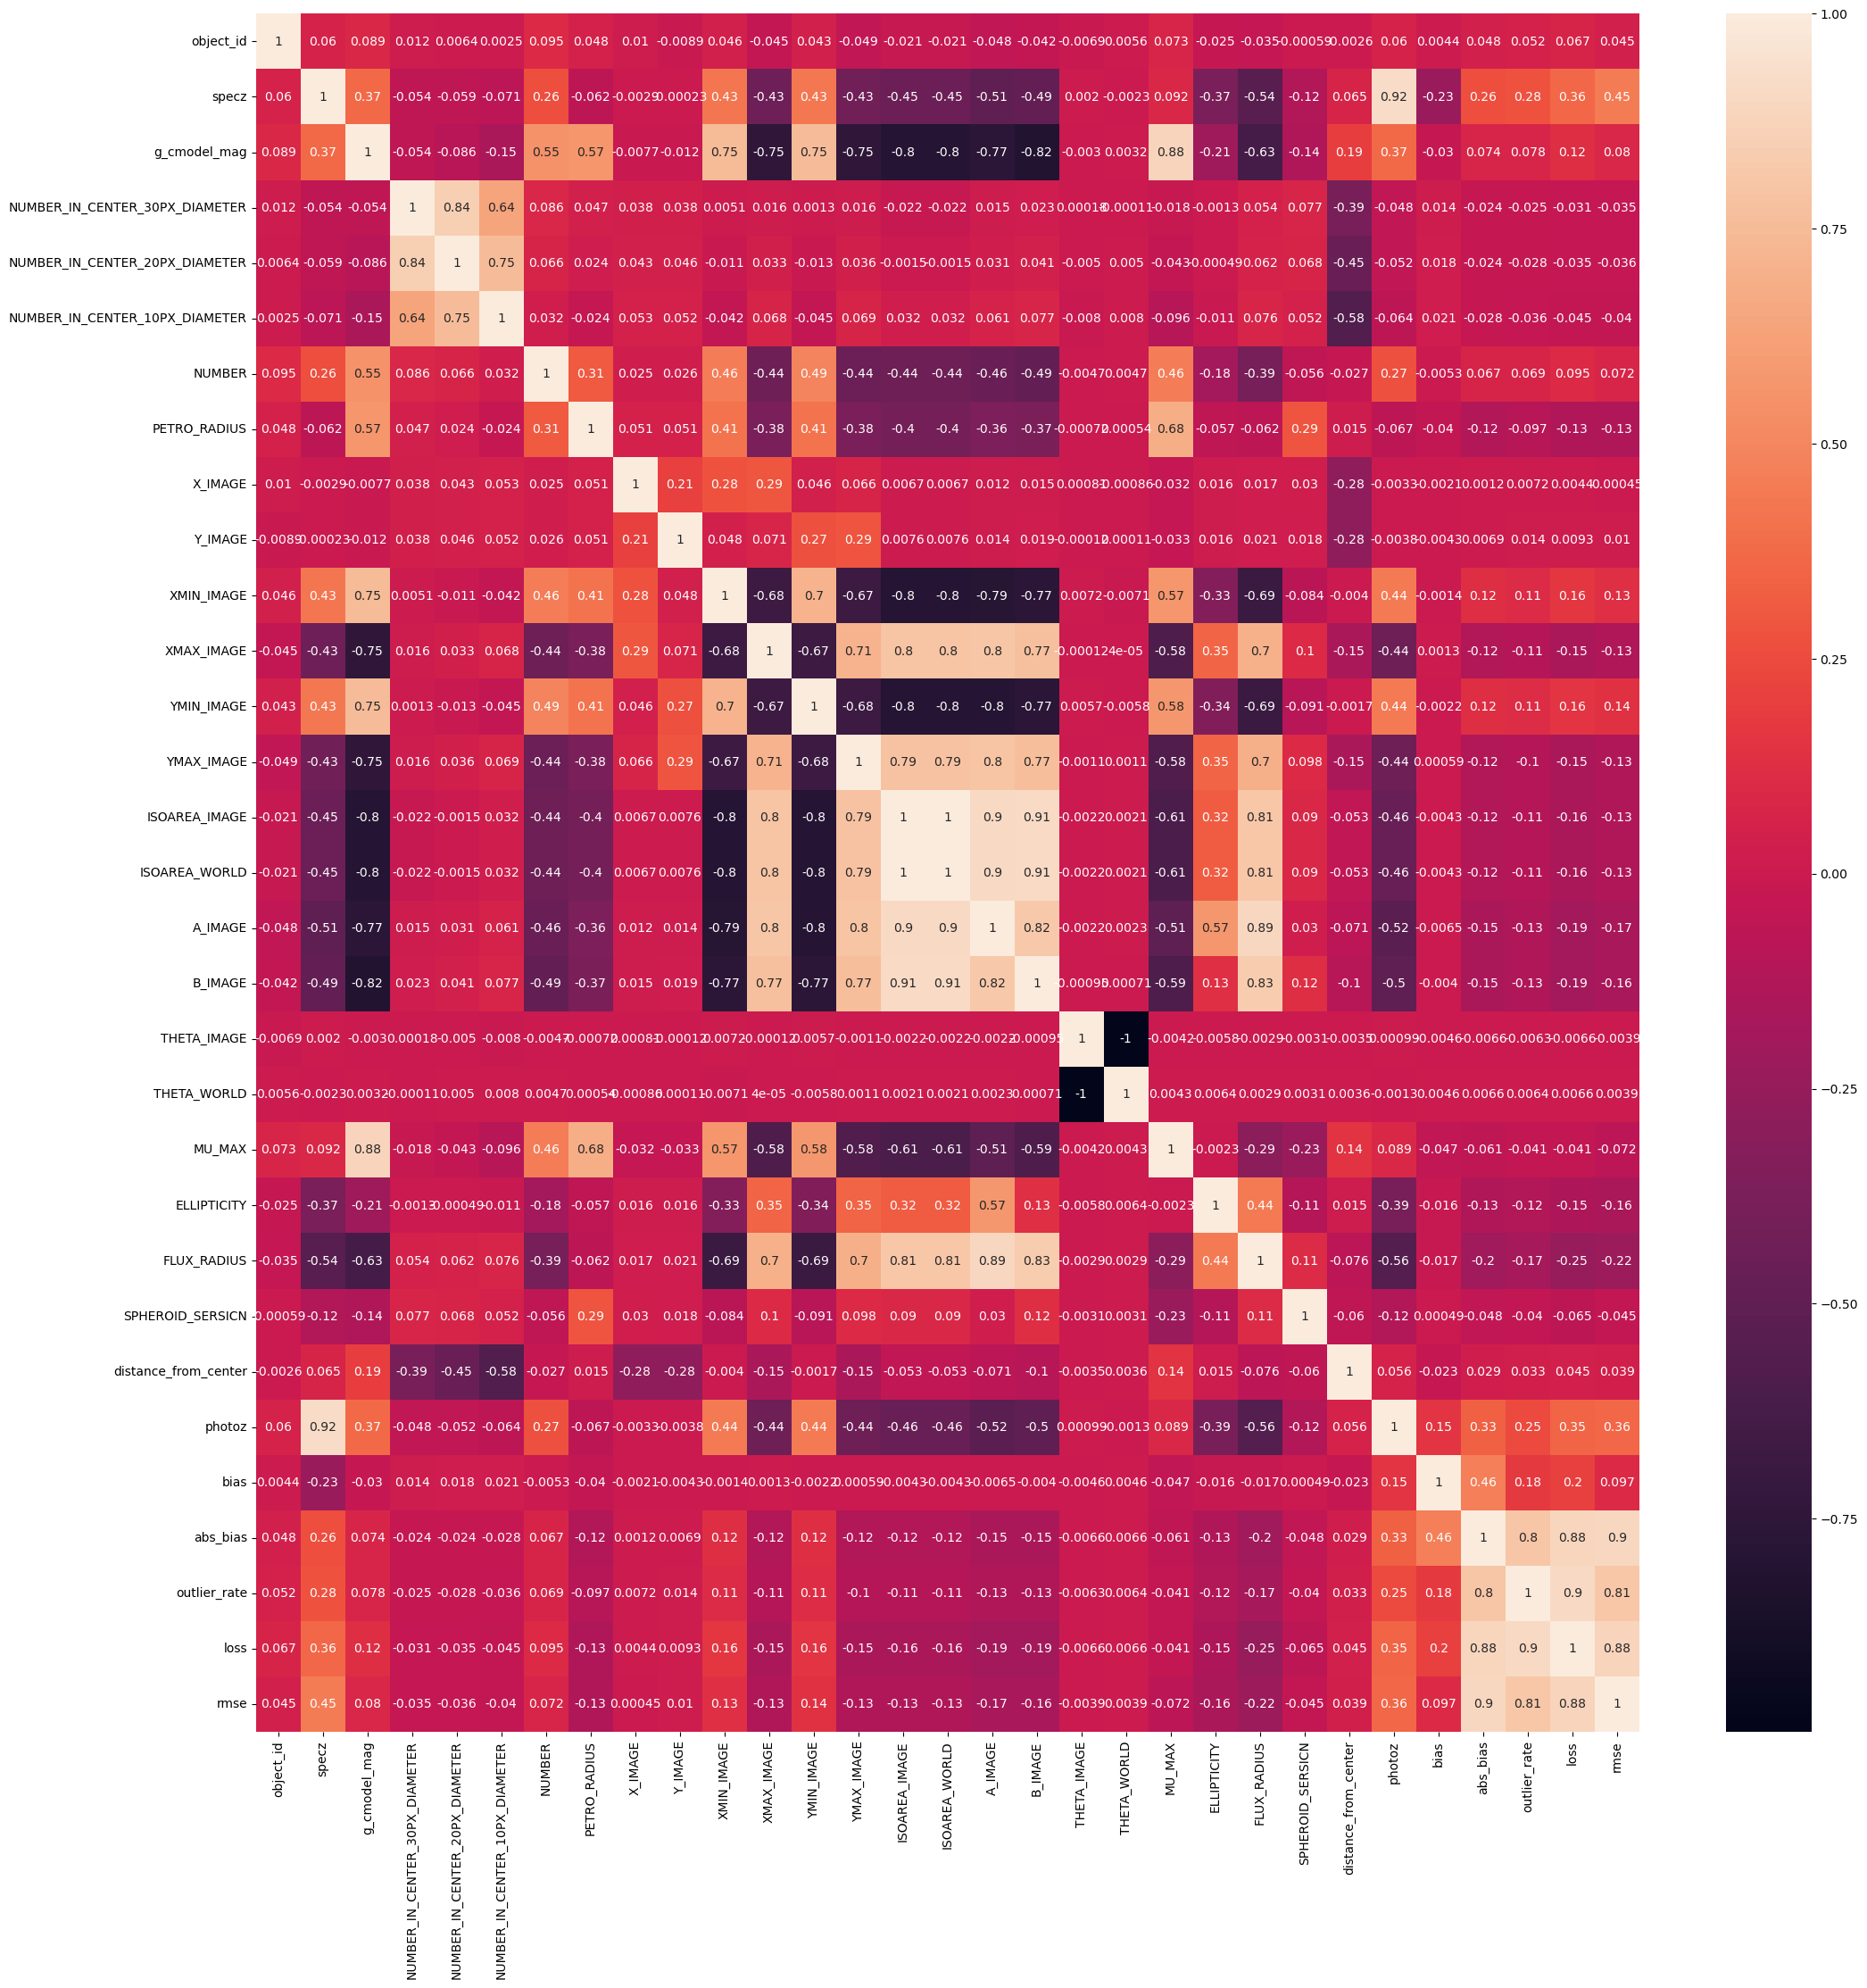

In [5]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot=True, ax=ax)

In [6]:
results_df = pd.DataFrame(columns=['variable_1', 'variable_2', 'corr', 'partial_corr', 'p_value', 'percent_change'])
for col1 in metrics:
    for col2 in params:
        corr = df[col1].corr(df[col2])
        partial_corr = pg.partial_corr(data=df, x=col1, y=col2, covar='specz')
        p_value = partial_corr['p-val'][0]
        percent_change = ((partial_corr['r'][0] - corr) / corr) * 100
        print(f"{col1} and {col2}: correlation = {corr:.4f}, partial correlation = {partial_corr['r'][0]:.4f}, p-value = {p_value:.3f}, percent change = {percent_change:.3f}")
        new_row = pd.Series([col1, col2, corr, partial_corr['r'][0], p_value, percent_change], index=results_df.columns)
        results_df = pd.concat([results_df, pd.DataFrame([new_row])], ignore_index=True)

bias and NUMBER_IN_CENTER_30PX_DIAMETER: correlation = 0.0143, partial correlation = 0.0021, p-value = 0.660, percent change = -85.137
bias and NUMBER_IN_CENTER_20PX_DIAMETER: correlation = 0.0185, partial correlation = 0.0053, p-value = 0.275, percent change = -71.464
bias and NUMBER_IN_CENTER_10PX_DIAMETER: correlation = 0.0208, partial correlation = 0.0048, p-value = 0.316, percent change = -76.710
bias and PETRO_RADIUS: correlation = -0.0396, partial correlation = -0.0552, p-value = 0.000, percent change = 39.355
bias and ISOAREA_IMAGE: correlation = -0.0043, partial correlation = -0.1204, p-value = 0.000, percent change = 2673.192
bias and A_IMAGE: correlation = -0.0065, partial correlation = -0.1435, p-value = 0.000, percent change = 2102.472
bias and B_IMAGE: correlation = -0.0040, partial correlation = -0.1344, p-value = 0.000, percent change = 3262.296
bias and THETA_IMAGE: correlation = -0.0046, partial correlation = -0.0043, p-value = 0.372, percent change = -7.319
bias and 

In [8]:
for metric in metrics:
    sub_df = results_df[results_df['variable_1'] == metric]
    sub_df = sub_df.iloc[1:].copy() # exclude self-correlation row
    sub_df['abs_corr'] = sub_df['corr'].abs()
    sub_df['abs_partial_corr'] = sub_df['partial_corr'].abs()
    sub_df = sub_df.sort_values(by=['corr', 'abs_partial_corr'], ascending=False)
    
    top_pos_features = sub_df[sub_df['corr'] > 0].iloc[:5]['variable_2'].tolist()
    top_neg_features = sub_df[sub_df['corr'] < 0].iloc[:5]['variable_2'].tolist()
    
    print(f"Most positively correlated features to {metric}: {', '.join(top_pos_features)}")
    print(f"Most negatively correlated features to {metric}: {', '.join(top_neg_features)}")


Most positively correlated features to bias: NUMBER_IN_CENTER_10PX_DIAMETER, NUMBER_IN_CENTER_20PX_DIAMETER, SPHEROID_SERSICN
Most negatively correlated features to bias: B_IMAGE, ISOAREA_IMAGE, THETA_IMAGE, A_IMAGE, ELLIPTICITY
Most positively correlated features to abs_bias: distance_from_center
Most negatively correlated features to abs_bias: THETA_IMAGE, NUMBER_IN_CENTER_20PX_DIAMETER, NUMBER_IN_CENTER_10PX_DIAMETER, SPHEROID_SERSICN, MU_MAX
Most positively correlated features to outlier_rate: distance_from_center
Most negatively correlated features to outlier_rate: THETA_IMAGE, NUMBER_IN_CENTER_20PX_DIAMETER, NUMBER_IN_CENTER_10PX_DIAMETER, SPHEROID_SERSICN, MU_MAX
Most positively correlated features to loss: distance_from_center
Most negatively correlated features to loss: THETA_IMAGE, NUMBER_IN_CENTER_20PX_DIAMETER, MU_MAX, NUMBER_IN_CENTER_10PX_DIAMETER, SPHEROID_SERSICN
Most positively correlated features to rmse: distance_from_center
Most negatively correlated features to rms